# Effects of Filters

Two filter are applied to the cutouts before estimating the median gradient direction and orientation in each cutout. The first is a Wiener filter:

$$ W_\ell = \frac{C_\ell}{C_\ell + C_{\ell, \text{noise}}} \;, $$ 

where $C_\ell$ is the large-scale structure lensed CMB temperature power spectrum and $ C_{\ell, \text{noise}}$ is the total noise power spectrum of the map. The Wiener filter is used to reduce the noise penalty in the gradient estimation. 
The second filter is a low-pass filter to remove the lensing signal in the cluster-lensed maps :

$$L_\ell = 
\begin{cases}
1 &  ,\text{ } \ell \leqslant 2000 \\
0 &  ,\text{ } \ell > 2000
\end{cases} \; , $$

Note that both filters are apllied on the cluster-unlensed maps in order to ensure that the median gradient direction and magnitude are estimated in the same way. The final filter is thus given by 

$$ W_{\ell, \text{final}} = 
\begin{cases}
\frac{C_\ell}{C_\ell + N_{\ell}} &  ,\text{ } \ell \leqslant 2000 \\
0 &  ,\text{ } \ell > 2000
\end{cases} \; . $$

Below, we show how the maps change after successively applying the individual filters to a cluster lensed CMB temperature map contain 2 $\mu$K-arcmin white noise.

In [1]:
### importing relevant modules ###
%load_ext autoreload 
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from pylab import rcParams
from matplotlib import rc;rc('text', usetex=True);rc('font', weight='bold');matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'
rcParams['font.family'] = 'serif'
rc('text.latex',preamble=r'\usepackage{/Volumes/Extreme_SSD/codes/master_thesis/code/configs/apjfonts}')
from mpl_toolkits.axes_grid1 import make_axes_locatable
sz_ft = 18
sz_lb = 18
import cosmo
from cosmo import CosmoCalc
import sims
import tools
import experiments as exp

/Volumes/Extreme_SSD/codes/master_thesis/code/cosmo.py:98: RuntimeWarning: invalid value encountered in true_divide
  cl = dl * 2 * np.pi / (l*(l+1))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:117: RuntimeWarning: divide by zero encountered in arctanh
  f[x3] = (1/np.sqrt(1-x[x3]**2))*np.arctanh(np.sqrt(1-x[x3]**2))
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:45: RuntimeWarning: invalid value encountered in true_divide
  alphaX_fft =  1j * lX * 2. *  kappa_map_fft / l2d**2
/Volumes/Extreme_SSD/codes/master_thesis/code/lensing.py:46: RuntimeWarning: invalid value encountered in true_divide
  alphaY_fft =  1j * lY * 2. *  kappa_map_fft / l2d**2


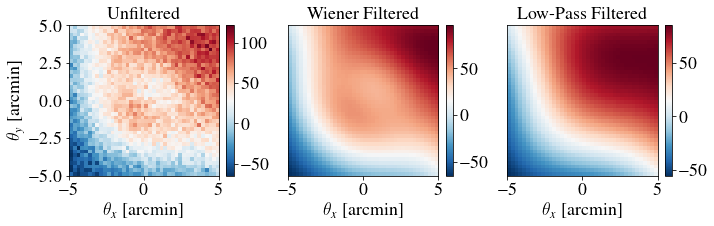

In [13]:
### settings used to generate a cluster-lensed CMB map ###
nber_maps = 1
map_params = [240, 0.25, 240, 0.25]
l, cl = CosmoCalc().cmb_power_spectrum()
cluster = [9e15, 3, 1]
l, bl = exp.beam_power_spectrum(beam_fwhm = 1.0)
l, nl = exp.white_noise_power_spectrum(noiseval_white = 2.0)
l, nl_deconvolved =  exp.white_noise_power_spectrum(noiseval_white = 2.0, beam_fwhm = 1.0)
cl_noise = nl_deconvolved


### computing the filters ###
wiener_filter = tools.wiener_filter(l, cl, cl_noise)
low_pass_filter = tools.low_pass_filter(l,  2000)


### creating and filtering the cluster-lensed CMB map ###
cmb_map = sims.cmb_mock_data(map_params, l, cl, cluster = cluster, bl = bl, nl = nl)
cmb_map_wiener_filtered = tools.convolve(cmb_map, l, wiener_filter, map_params = map_params) 
cmb_map_low_pass_filtered = tools.convolve(cmb_map_wiener_filtered, l, low_pass_filter, map_params = map_params) 
maps = [cmb_map, cmb_map_wiener_filtered, cmb_map_low_pass_filtered]


### plotting the (10'x10') central cutout of the three maps to show the effect of the filters ###
_, extent = tools.make_grid([40, 0.25, 40, 0.25])
fig, axs = plt.subplots(1,3, figsize=(10,10))
titles = ['Unfiltered', 'Wiener Filtered', 'Low-Pass Filtered']

for i, ax in enumerate(axs):
    im = ax.imshow(maps[i][100:140, 100:140], extent = extent, cmap = cm.RdBu_r)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size = "5%", pad = 0.1)
    cb = fig.colorbar(im, cax = cax)
    cb.ax.tick_params(labelsize = sz_lb)
    ax.set_xlabel(r'$\theta_x\ $'+'[arcmin]', fontsize = sz_ft)
    if i == 0:
        ax.set_ylabel(r'$\theta_y\ $'+'[arcmin]', fontsize = sz_ft)
    else: 
        ax.get_yaxis().set_visible(False)
    ax.set_title(titles[i], fontsize = sz_ft)
    ax.tick_params(labelsize = sz_lb)
    
fig.tight_layout(pad=1)
fig.savefig('/Volumes/Extreme_SSD/codes/master_thesis/code/figures/effect_of_filters.eps', dpi = 200, bbox_inches = 'tight')

As can be seen from the cutouts, the Wiener filter removes most of the white noise but the map will stilll containg the lensing signal from the cluster. After additionally applying the low-pass filter, the lensing signal is properly removed. 